# Compare the emperical cumulative distributions for by forecast hour

In [137]:
%matplotlib inline

import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, pluck_hrrr_point
from BB_MesoWest.get_MesoWest import get_mesowest_percentiles
from BB_MesoWest.get_MesoWest import get_mesowest_stninfo

In [138]:
mpl.rcParams['figure.figsize'] = [5,5]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 300

In [139]:
# Load the HRRR lat/lon grid
H = get_hrrr_latlon()
lat = H['lat']
lon = H['lon']

In [143]:
def get_point_percentiles(DATE, fxx=0, use_old=False):
    ## PP stands for Percentiles Point
    print('Working on', DATE)
    
    if use_old:
        var = variable.replace(' ', '_').replace(':', '_')
        DIR = '/uufs/chpc.utah.edu/common/home/horel-group8/blaylock/HRRR_OSG/hourly30/%s/' % var
        FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f%02d.h5' % (var, DATE.month, DATE.day, DATE.hour, fxx)
    else:
        var = variable.replace(' ', '-').replace(':', '-')
        DIR = '/uufs/chpc.utah.edu/common/home/horel-group8/blaylock/HRRR_OSG/hourly31_twoyears/%s/' % var
        FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f%02d.h5' % (var, DATE.month, DATE.day, DATE.hour, fxx)
        
    
    PP = np.array([])
    with h5py.File(DIR+FILE, 'r') as f:
        for i in percentiles:
            PP = np.append(PP, f["p%02d" % i][x][y])
    
    # Convert Units
    if variable == 'TMP:2 m' or variable == 'DPT:2 m':
        PP -= 273.15
    
    return PP

def get_grid_percentiles(DATE, pxx, fxx=0, use_old=False):
    if use_old:
        var = variable.replace(' ', '_').replace(':', '_')
        DIR = '/uufs/chpc.utah.edu/common/home/horel-group8/blaylock/HRRR_OSG/hourly30/%s/' % var
        FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f%02d.h5' % (var, DATE.month, DATE.day, DATE.hour, fxx)
    else:
        var = variable.replace(' ', '-').replace(':', '-')
        DIR = '/uufs/chpc.utah.edu/common/home/horel-group8/blaylock/HRRR_OSG/hourly31_twoyears/%s/' % var
        FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f%02d.h5' % (var, DATE.month, DATE.day, DATE.hour, fxx)
        
    with h5py.File(DIR+FILE, 'r') as f:
        grid = f['p%02d' % pxx][:]
        print(FILE)
        print('  Cores:', f['cores'].value)
        print('  Samples:', f['count'].value)
        print('  Beginning Date:', f['Beginning Date'].value)
        print('  Ending Date:', f['Ending Date'].value)
        
    if variable == 'TMP:2 m' or variable == 'DPT:2 m':
        grid -= 273.15
    
    return grid    
    

In [180]:
DATE = datetime(2016, 8, 12, 12)
variable = 'TMP:2 m'
STID = 'RDN'


fxx = [0, 9, 18]
percentiles = [0, 1, 2, 3, 4, 5, 10, 25, 33, 50, 66, 75, 90, 95, 96, 97, 98, 99, 100]

In [181]:
if variable == 'TMP:2 m':
    label = '2 m Temperature (C)'
    MWvar = 'air_temp'
if variable == 'UVGRD:10 m':
    label = r'10 m Wind Speed (m s$\mathregular{^{-1}}$)'
    MWvar = 'wind_speed'

In [182]:
S = get_mesowest_stninfo(STID)[STID]

# Pluck a point
x, y = pluck_hrrr_point(H, lat=S['LAT'], lon=S['LON'], XY_only=True)


Retrieving from MesoWest API: http://api.mesowest.net/v2/stations/metadata?&token=2562b729557f45f5958516081f06c9eb&stid=RDN

 >> Requested Center lat: 39.989	 lon: -111.3701
 >>     Plucked HRRR lat: 39.99219	 lon: -111.35826
 >>     Plucked from   x: 614	   y: 507


In [183]:
f00 = get_point_percentiles(DATE, fxx=0)
f09 = get_point_percentiles(DATE, fxx=9)
f18 = get_point_percentiles(DATE, fxx=18)

Working on 2016-08-12 12:00:00
Working on 2016-08-12 12:00:00
Working on 2016-08-12 12:00:00


In [184]:
MW = get_mesowest_percentiles(STID, variable=MWvar,
                              percentiles='ALL', ECD=True,
                              sDATE=DATE, eDATE=DATE)


Retrieving from MesoWest API: http://api.synopticlabs.org/v2/percentiles?&token=2562b729557f45f5958516081f06c9eb&start=081212&end=081212&vars=air_temp&stid=RDN&psource=PERCENTILES2



In [185]:
old = get_point_percentiles(DATE, use_old=True)

Working on 2016-08-12 12:00:00


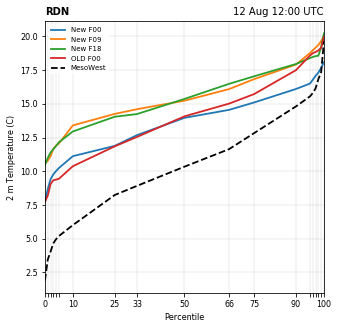

In [186]:
plt.plot(percentiles, f00, label='New F00')
plt.plot(percentiles, f09, label='New F09')
plt.plot(percentiles, f18, label='New F18')
plt.plot(percentiles, old, label='OLD F00')

plt.plot(percentiles, MW['PERCENTILES'][0], label='MesoWest', linestyle='--', color='k')

plt.grid()

plt.legend()
legend = plt.gca().legend(frameon=True, framealpha=.8, loc=2)
legend.get_frame().set_linewidth(0)

plt.title('%s' % (STID), fontweight='semibold', loc='left')
plt.title('%s' % (DATE.strftime('%d %b %H:00 UTC')), loc='right')
plt.xlabel('Percentile')
tick_labels = [0,'','','','','', 10, 25, 33, 50, 66, 75, 90, '', '', '', '','',100]
plt.xticks(percentiles, tick_labels)
plt.xlim([0,100])
plt.ylabel('%s' % (label))

plt.savefig('ECD_%s_%s' % (STID, variable.replace(':', '-').replace(' ', '-')))

---

Compare the HRRR domain for a single variable and percentile

In [116]:
f00_p50 = get_grid_percentiles(DATE, 50, fxx=0)
f09_p50 = get_grid_percentiles(DATE, 50, fxx=9)
f18_p50 = get_grid_percentiles(DATE, 50, fxx=18)
old = get_grid_percentiles(DATE, 50, fxx=0, use_old=True)

OSG_HRRR_TMP-2-m_m10_d08_h21_f00.h5
  Cores: 8
  Samples: 61
  Beginning Date: 2016-09-23 21:00:00
  Ending Date: 2017-10-23 21:00:00
OSG_HRRR_TMP-2-m_m10_d08_h21_f09.h5
  Cores: 8
  Samples: 62
  Beginning Date: 2016-09-23 21:00:00
  Ending Date: 2017-10-23 21:00:00
OSG_HRRR_TMP-2-m_m10_d08_h21_f18.h5
  Cores: 8
  Samples: 61
  Beginning Date: 2016-09-23 21:00:00
  Ending Date: 2017-10-23 21:00:00
OSG_HRRR_TMP_2_m_m10_d08_h21_f00.h5
  Cores: 8
  Samples: 90
  Beginning Date: b'2015-09-23-21:00'
  Ending Date: b'2017-10-22-21:00'


Text(0.5,1,'New-Old')

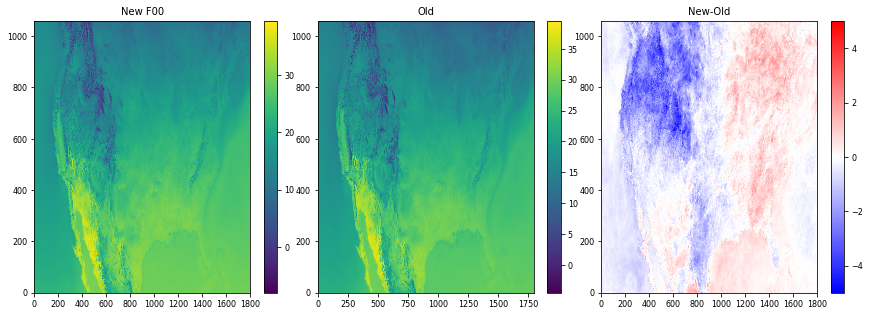

In [117]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

plt.sca(ax1)
plt.pcolormesh(f00_p50)
plt.colorbar()
plt.title('New F00')

plt.sca(ax2)
plt.pcolormesh(old)
plt.colorbar()
plt.title('Old')

plt.sca(ax3)
plt.pcolormesh(f00_p50-old, vmax=5, vmin=-5, cmap='bwr')
plt.colorbar()
plt.title('New-Old')